In [1]:
#for tweaking figure for paper

In [1]:
%pylab inline
import matplotlib.gridspec as gridspec

from astropy.io import fits as pyfits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import requests
import random
mpl.rcParams['text.usetex']=True
mpl.rcParams['axes.linewidth'] = 3
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18 



Populating the interactive namespace from numpy and matplotlib


In [2]:
def download_from_dropbox(url):
    
    local_filename = "../{:}".format(url.split("/")[-1].split("?")[0])
    r = requests.get(url, stream=True)
    with open(local_filename, 'wb') as f:
        for chunk in r.iter_content(chunk_size=1024): 
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)
                f.flush()
            
    return local_filename

In [19]:
#load Hubble data 
hubble_meta_name = download_from_dropbox('https://www.dropbox.com/s/oqxk3pyms6u2851/meta_catalog_3_23_2016_hubble.fits?dl=1')
data = Table.read(hubble_meta_name)
#load ferengi data 
ferengi_filename = download_from_dropbox("https://www.dropbox.com/s/r88l9u5fcsbppui/ferengi_all_weighted_and_meta.fits?dl=1")
f_data = Table.read(ferengi_filename) 

/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning
/usr/local/lib/python2.7/dist-packages/requests/packages/urllib3/util/ssl_.py:120: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause ce

In [20]:
#purple/green plot for hubble more better:
#Select ferengi ranges so contours make sense

# Limit to galaxies that have data at z_sim = z0, since that's what we're normalizing to.
z0 = 0.3
unique_galaxies = set(f_data['objid'])
z0ind = np.zeros(len(f_data),dtype=bool)
eps = 1e-3
for ug in unique_galaxies:
    ind = (f_data['objid'] == ug)
    if f_data[ind]['sim_redshift'].min() < (z0+eps):
        z0ind[ind] = True
        
data_z0 = f_data[z0ind]

#smooth out redshifts 
#for gal in data_z0:
#    z=round(gal['sim_redshift']*1000,1)
#    gal['sim_redshift'] = random.randrange(z-50,z+50)/1000.


In [21]:
## Eye of Sauron again, but flip: Hubble = contours, ferenti = histogram

#define ferengi histogram
fhist,fxedges,fyedges=np.histogram2d(data_z0['sim_redshift'],data_z0['mu_max_i'],bins=(20,20),range=((0,2),(16,26)))
fextent=[fxedges[0],fxedges[-1],fyedges[0],fyedges[-1]]
histy,xedges,yedges=np.histogram2d(data['Z_BEST'],data['MU_HI'],range=((0,2),(16,26)))
extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]]


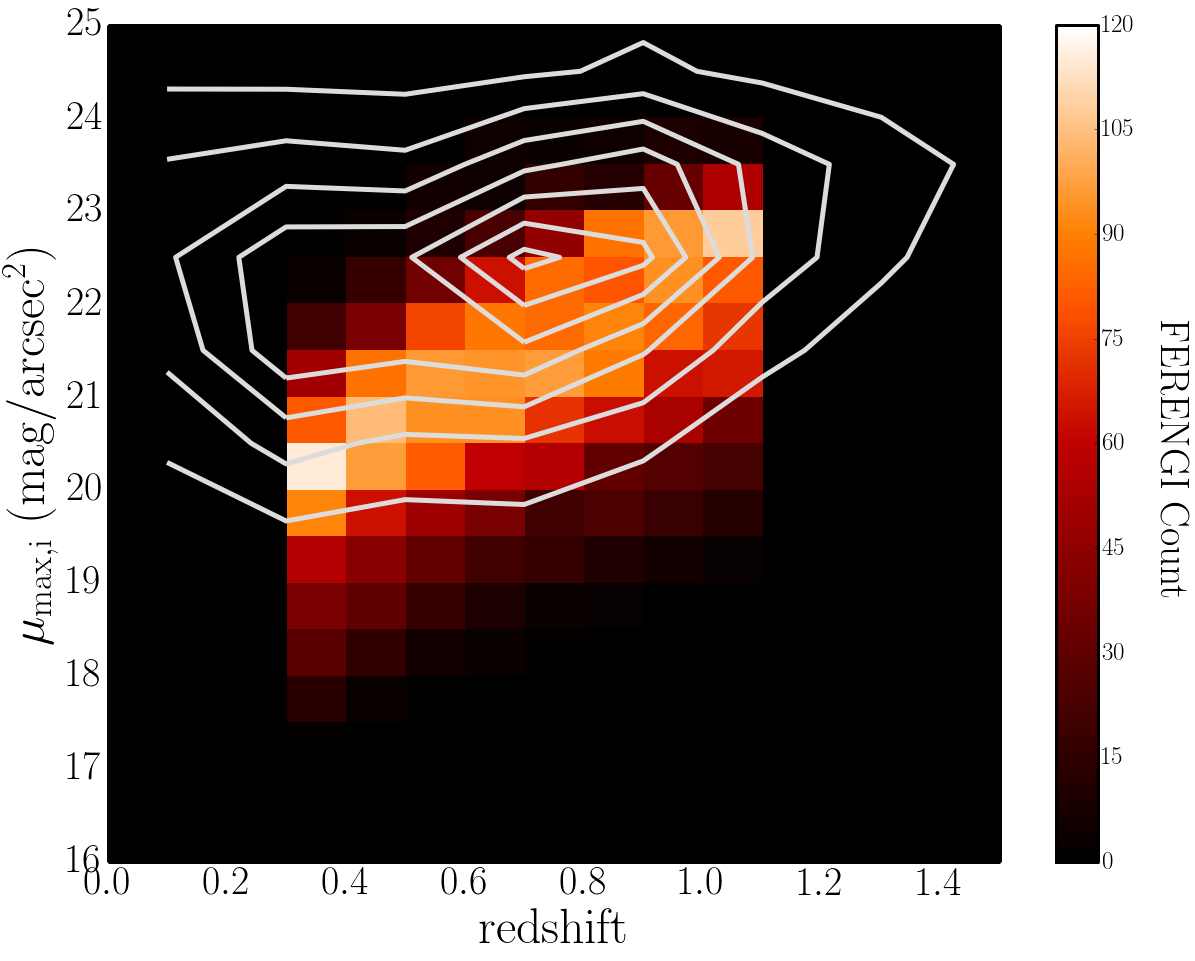

In [31]:
#plot 

mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 25 

f=plt.figure(figsize=(20,15))
vmax = 120
plt.imshow(fhist.T,origin='lower',extent=fextent,interpolation='nearest',aspect='auto',cmap=cm.gist_heat,vmax=vmax)
plt.colorbar()
f_contour=plt.contour(histy.T,origin='lower',extent=extent,colors='#DCDCDC',linewidths=5)
#plt.clabel(f_contour, inline=1, fontsize=20) to get contour levels

plt.xlim(0,1.5)
plt.ylim(16,25)

plt.xlabel(r'$\mathrm{redshift}$',fontsize=50)
plt.ylabel(r'$\mathrm{\mu_{max,i}~(mag/arcsec^2)}$',fontsize=50)
plt.tick_params(labelsize=40)

f.text(.85,.6,'$\mathrm{FERENGI~Count}$',fontsize=40,rotation = 270)

plt.savefig('../writeup/figures/eye_of_sauron.pdf')
